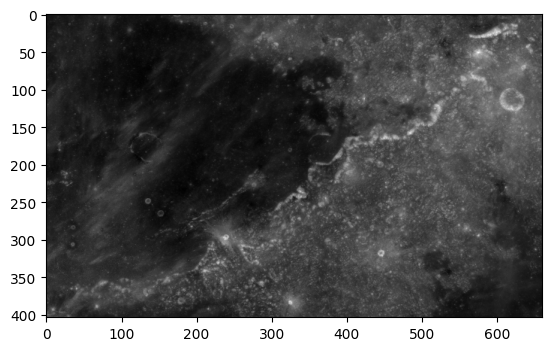

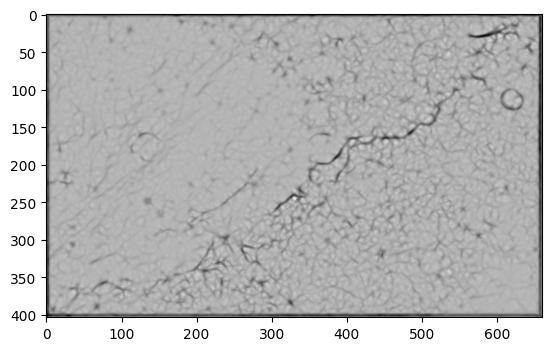

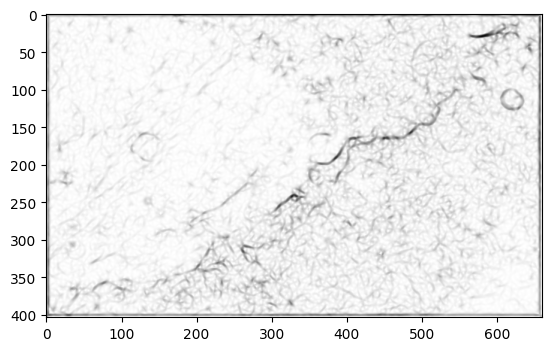

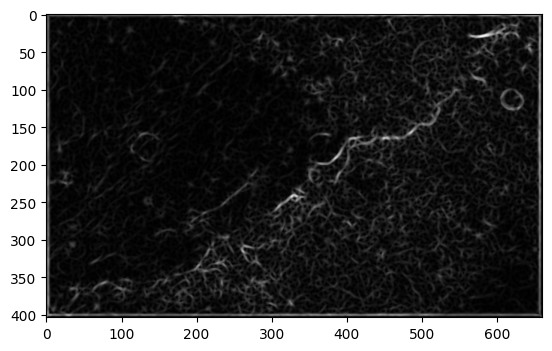

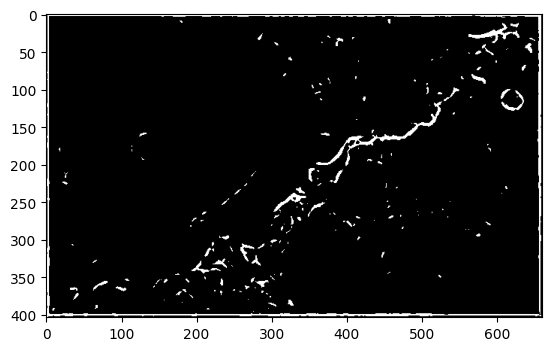

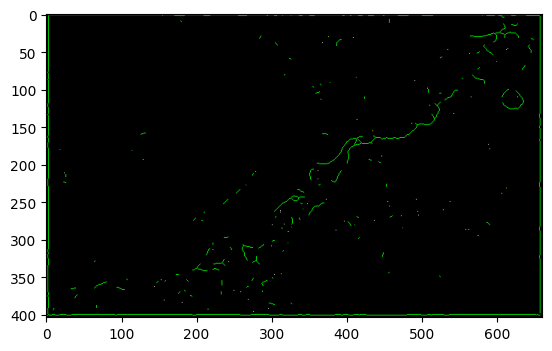

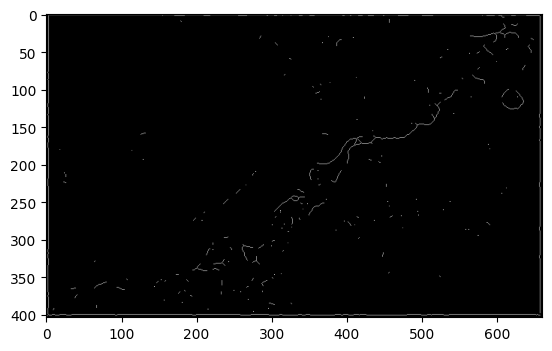

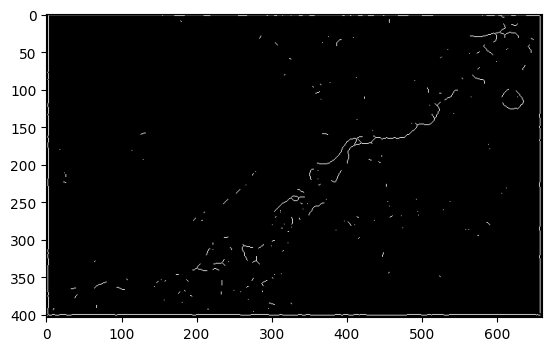

Connected component 0 has size 2108 km
Connected component 1 has size 256 km
Connected component 2 has size 95 km
Connected component 3 has size 52 km
Connected component 4 has size 47 km
Connected component 5 has size 34 km
Connected component 6 has size 25 km
Connected component 7 has size 25 km
Connected component 8 has size 21 km
Connected component 9 has size 21 km


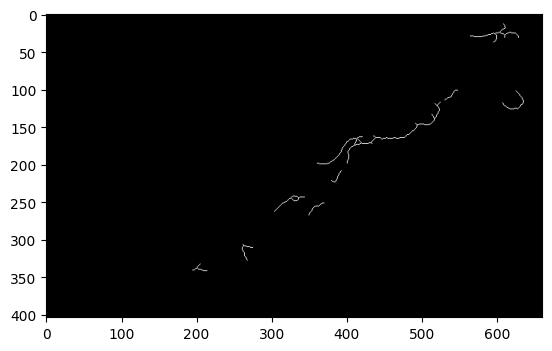

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage.morphology import skeletonize
from skimage import data
from skimage.util import invert
from skimage import morphology, filters
from skimage import io, filters, feature
from skimage import util
from skimage.filters import threshold_otsu

# calculating the hessian here, the most interesting part
def detect_ridges(gray, sigma):
    hessian = hessian_matrix(gray, sigma=sigma, order='rc')
    min_ridges = hessian_matrix_eigvals(hessian)[1]
    return min_ridges

# basically an image of the moon where we zoomed in 100% to get
# the actual resolution, which was about 400 meters per pixel
im = cv2.imread('100%zoom_400mperpx.png')
img = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

a = detect_ridges(img, sigma=2)
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(a, cmap='gray')
plt.show()
bg = cv2.dilate(a, np.ones((5,5), dtype=np.uint8))
bg = cv2.GaussianBlur(bg, (5,5), 1)
a_no_bg = 255 - cv2.absdiff(a, bg)
plt.imshow(a_no_bg, cmap='gray')
plt.show()

inverted = util.invert(a_no_bg)
plt.imshow(inverted, cmap='gray')
plt.show()
plt.imsave('inverted.jpg', inverted, cmap='gray')
inv = cv2.imread('inverted.jpg')
ret, th1 = cv2.threshold(inv, 65, 255, cv2.THRESH_BINARY)# | cv2.THRESH_OTSU)
plt.imshow(th1, cmap='gray')
plt.show()

skeleton = skeletonize(th1)
plt.imshow(skeleton, cmap='gray')
plt.show()
cv2.imwrite('greens.png', skeleton)
gri = cv2.imread('greens.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(gri, cmap='gray')
plt.show()
dum, gri_bin = cv2.threshold(gri, 65, 255, cv2.THRESH_BINARY)
plt.imshow(gri_bin, cmap='gray')
plt.show()
# connected component labeling to identify the connected components in the image
comp, labels = cv2.connectedComponents(gri_bin)

sizes = []

# labels image now contains a unique label for each connected component
# loop through the labels image and analyze each component individually
for label in range(1, comp):
    # extract the component with the current label
    component = np.zeros_like(gri_bin)
    component[labels == label] = 255

    # count the number of pixels
    size = cv2.countNonZero(component)
    
    sizes.append((label, size))

# empty image to store the first 10 components
output_image = np.zeros_like(gri_bin)

# sort components by size
sizes.sort(key=lambda x: x[1], reverse=True)

# extract the first 10 components and add them to the output image
for i in range(10):
    component = np.zeros_like(gri)
    component[labels == sizes[i][0]] = 255
    output_image += component
    size = cv2.countNonZero(component)
    distances = [0] * len(sizes)
    total_dist = 0
    print(f'Connected component {i} has size {size*1} km')

output_image[labels == 1] = 0
os.remove('greens.png')
os.remove('inverted.jpg')
comp2, labels2 = cv2.connectedComponents(output_image)

#output_image2 = np.zeros_like(output_image)
#for i in range(10):
#    component = np.zeros_like(output_image)
#    component[labels == sizes[i][0]] == 255
#    output_image2

#for i in np.nditer(comp2):
#    plt.imshow(comp2, cmap='gray')
#    plt.show()


plt.imshow(output_image, cmap='gray')
plt.show()
